## Class 1 - Formulating a modeling problem
In our first lecture, we discussed a few overarching points related to this course. Let's do a quick recap:
- The core of this course will be devoted to exploring ways in which we can extract knowledge from data;
- This relies on the fact that we need to be able to "ask questions" to our data;
- Most of these questions will revolve around learning a mathematical or algorithmic model of relations between some features and an outcome, or, when no outcome is available, learning "structures" within our feature space;
- We can do so for two (not mutually exclusive) reasons: to be able to infer the outcome from the features we can observe or to understand how and why inputs and outcomes are related;
- Here, we will mostly focus on developing models which are **good at inferring outcomes from features** in new data.


We emphasized that an important skill for a data scientist is that of being able to identify **questions** that can be answered with data. Let's start getting our hands dirty with this in this first class. Today, the focus will be formulating an interesting predictive questions based on a dataset of your own choice.

### Structure of today's exercise
For this class, your goal is to perform the following tasks:
1. Together with your group, choose one of these datasets (or find a new one)
    - HippoCorpus (a dataset of recalled or imagined stories, paired with a number of story- and participant-related metadata: https://www.kaggle.com/datasets/saurabhshahane/hippocorpus)
    - EEG Psychiatric Disorders Dataset: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset?resource=download (from this paper: https://www.frontiersin.org/journals/psychiatry/articles/10.3389/fpsyt.2021.707581/full)
    - Personalities and random number choices from OpenPsychometrics: https://openpsychometrics.org/_rawdata/ (search for "random numbers")
    - A large-scale data set containing data from a bike-sharing service and weather information: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset.

2. Load the corresponding data, which you will find under `Project Files/data` using `pandas`

3. Using `pandas` and `seaborn`, get a grasp of the overall characteristics of the dataset:
    - What is the size of your dataset, and how many features are available? 
        - Hint: Use `DataFrame.shape` from `pandas`
    - What kind of information do the columns include?
        - Hint: Read the dataset's documentation + associated papers. Methods like `.info()` or `.describe()` could also be useful.
    - What *types* of variables does each of the column contain? What kind of values do we expect to find in each column?
        - Hint: to extract this information analytically, look into `pandas` `dtype`, `unique`, and `min`/`max` functions
        - To plot this information, use `seaborn` functions (`displot`, `pointplot`, `catplot` or `boxplot` could be helpful)
    - What is the proportion of missing values for each column? Is there any column with a worryingly high proportion of missing values?
        - Hint: use the `.isnull()` method and aggregate over rows using `.sum()`
    - What is the proportion of missing values for each row? Is there any row with a worryingly high proportion of missing values?
        - Hint: very similar to what you did above
    - Is there any very apparent structure in your data, e.g., clusters of highly correlated features? 
        - Hint: use pandas `.corr()` and seaborn `clustermap` to look into that: https://seaborn.pydata.org/generated/seaborn.clustermap.html

4. Think about what information the dataset contains, and formulate one of the following:
    - A prediction question that can be addressed in terms of predictive performance in a regression task;
    - A prediction question that can be addressed in terms of predictive performance in a classification task

5. For the regression OR classification task you have formulated, answer the following questions:
    - What kind of metric can you use to assess whether the model predicts successfully?
    - What is the simplest performance baseline with no predictors you can use to assess your model's accuracy?
    - What is the simplest performance baseline with predictors you can use to assess your model's accuracy?
    - Can you produce some visualizations to get a sense for whether any clear pattern is emerging?
        - Hint: you can use `seaborn` `displot`, `pointplot` or `boxplot` to visualize distributions and their summaries, `scatterplot` or `lmplot` to produce scatterplots 
        (e.g., visualizing relations between variables)

### Once you have done this
1. Share your answers to 4 and 5 on the Brightspace Padlet
2. Keep your notebooks, I will ask you to briefly run us through them!
3. Next week, we will select a subset of your questions, and work on them for the first few weeks

In [1]:
import pandas as pd
import os

path = os.path.join("..", "_data", "hippoCorpus", "hippoCorpusV2.csv")

hippoCorpus = pd.read_csv(path)

/var/folders/ll/fp10h_1j0d1ddcld2t3r_dpr0000gn/T/ipykernel_39487/3036941019.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
path2 = os.path.join("..", "_data", "bike_sharing_dataset", "hour.csv")
path3 = os.path.join("..", "_data", "bike_sharing_dataset", "day.csv")

bike_hour = pd.read_csv(path2) # bike sharing counts aggregated on hourly basis. Records: 17379 hours
bike_day = pd.read_csv(path3) # bike sharing counts aggregated on daily basis. Records: 731 days

### Variables

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : Whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Vizzz

1. casual brugere er mere afhængige af vejret, mens registerede er mere afhængige af vejret
2. Registered users depend more on wheteher it is workday or not, than casual users
3. Correlation between temp, windspeed, weathersit, hum

Dependent variables: casual, registered

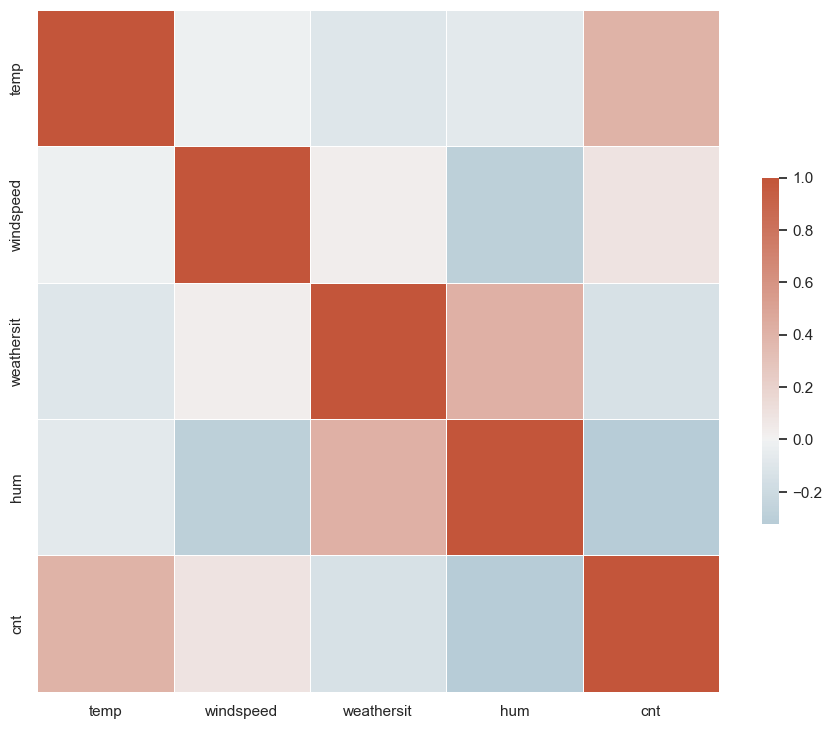

                temp  windspeed  weathersit       hum       cnt
temp        1.000000  -0.023125   -0.102640 -0.069881  0.404772
windspeed  -0.023125   1.000000    0.026226 -0.290105  0.093234
weathersit -0.102640   0.026226    1.000000  0.418130 -0.142426
hum        -0.069881  -0.290105    0.418130  1.000000 -0.322911
cnt         0.404772   0.093234   -0.142426 -0.322911  1.000000


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# subsetting the variables I'm interested in
bike_hour_corr = bike_hour[['temp', 'windspeed', 'weathersit', 'hum', 'cnt']]
bike_hour_corr

# Calculate correlation matrix
corr = bike_hour_corr.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

# Print the correlation matrix
print(corr)

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


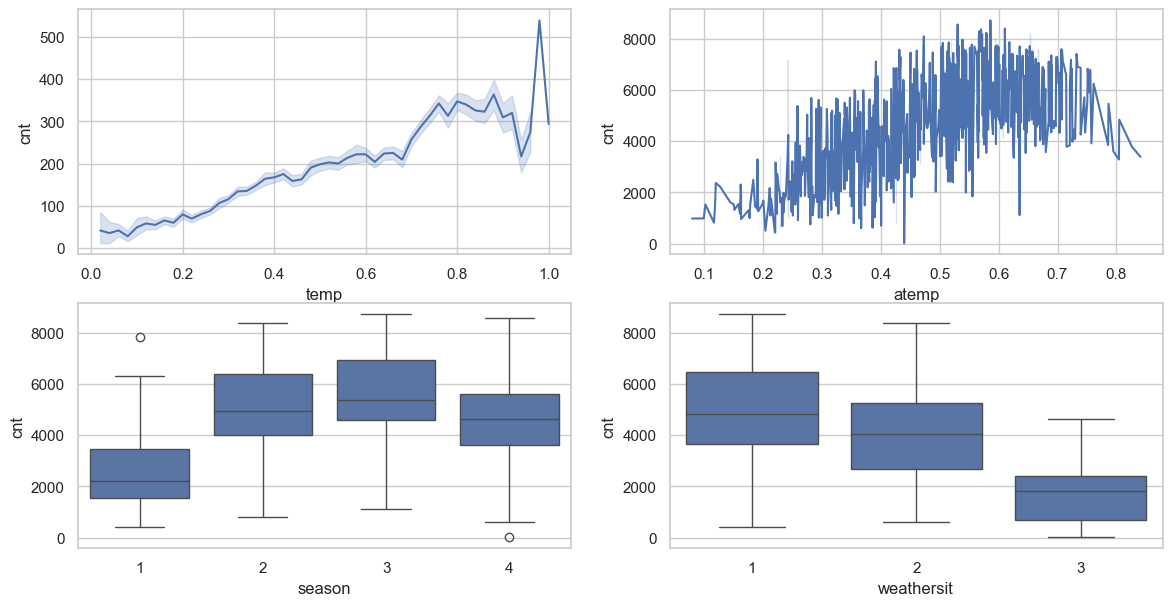

In [11]:
print(bike_hour.head(5))

# make a graph of bike sharing counts based in temperature
import matplotlib.pyplot as plt
import seaborn as sns



# put all plots into one figure
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
sns.lineplot(x="temp", y="cnt", data=bike_hour, ax=axes[0, 0])
sns.lineplot(x="atemp", y="cnt", data=bike_day, ax=axes[0, 1])
sns.boxplot(x="season", y="cnt", data=bike_day, ax=axes[1, 0])
sns.boxplot(x="weathersit", y="cnt", data=bike_day, ax=axes[1, 1])
plt.show()

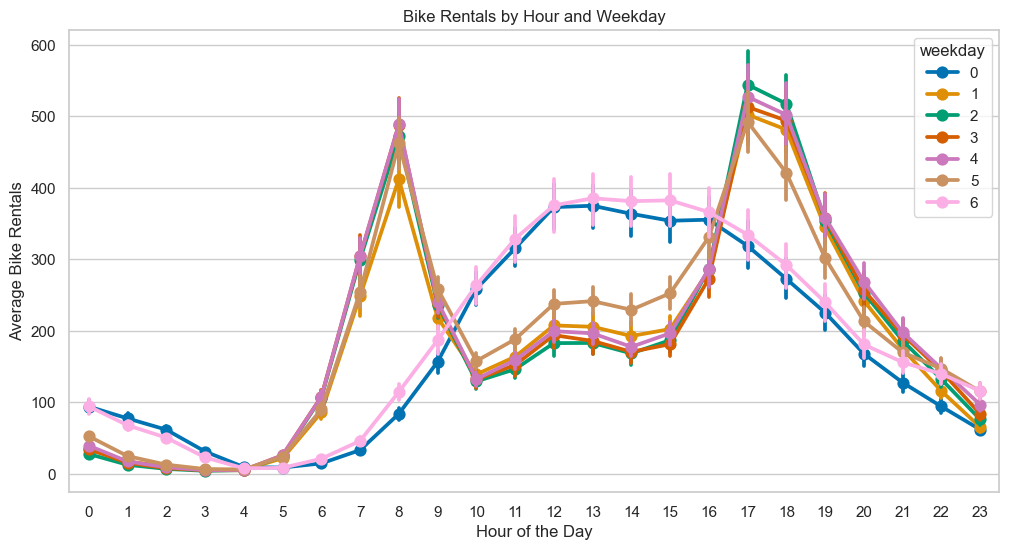

/var/folders/ll/fp10h_1j0d1ddcld2t3r_dpr0000gn/T/ipykernel_39487/883581136.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=bike_hour, estimator=sum, ci=None)


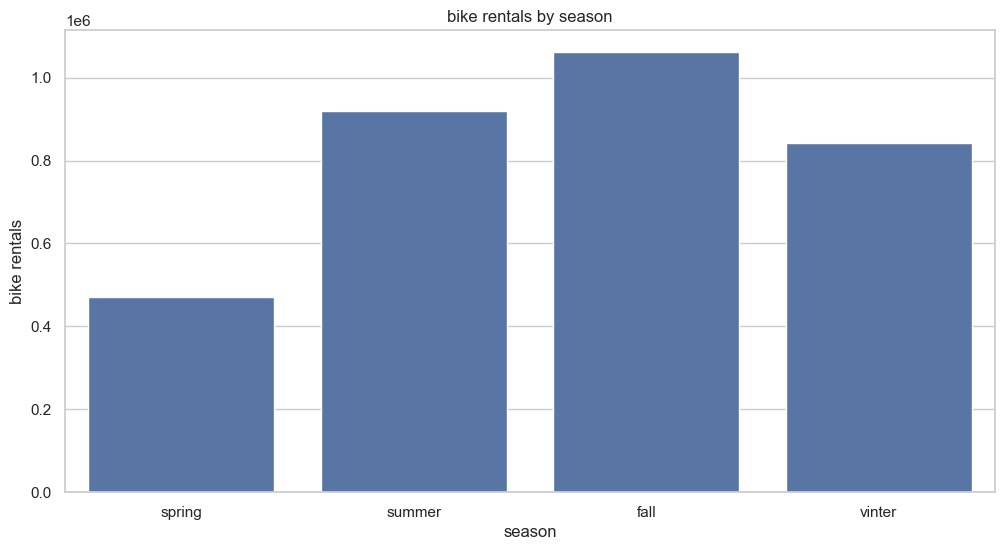

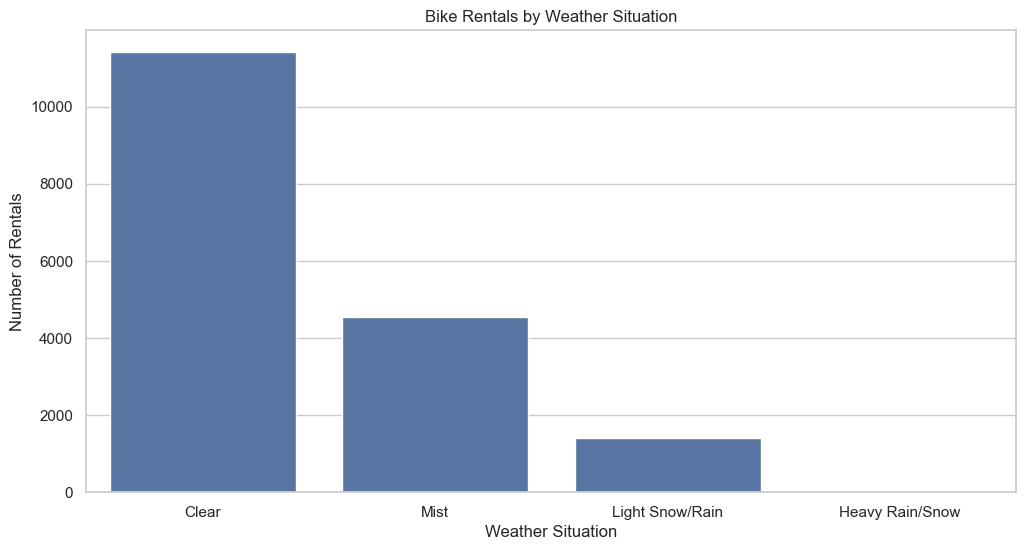

In [10]:
# converting the date column to datetime
bike_hour["dteday"] = pd.to_datetime(bike_hour["dteday"])

# Bike rentals by hour
plt.figure(figsize=(12, 6))
sns.pointplot(x='hr', y='cnt', data=bike_hour, hue='weekday', palette='colorblind')
plt.title('Bike Rentals by Hour and Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.show()

# dataset with data from 2011


# Bike rentals by season
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=bike_hour, estimator=sum, ci=None)
plt.title('bike rentals by season')
plt.xlabel('season')
plt.ylabel('bike rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['spring', 'summer', 'fall', 'vinter'])
plt.show()

# Number of rentals according to the weather situation
plt.figure(figsize=(12, 6))
sns.countplot(x='weathersit', data=bike_hour)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Number of Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

## Regression

In [28]:
# regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into features and target variable
X = bike_hour[['temp']]
y = bike_hour['cnt']

# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# linear model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mean_squared_error(y_test, y_pred)


26316.35098868848

In [33]:
# Split the dataset into features and target variable
X = bike_hour[['hum']]
y = bike_hour['cnt']

# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# linear model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
f'Mean squared error: {mean_squared_error(y_test, y_pred)}'

#plotting 

'Mean squared error: 28478.38350264289'